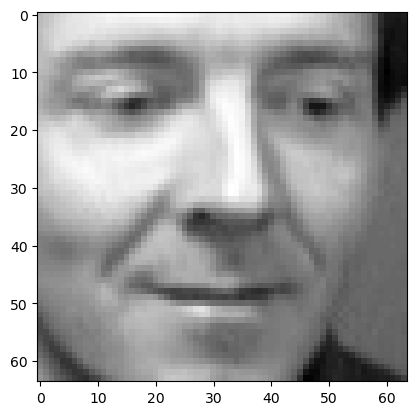

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


faces_image = np.load('dataset/olivetti_faces.npy')
faces_target = np.load('dataset/olivetti_faces_target.npy')

n_row = 64
n_col = 64

faces_data = faces_image.reshape(faces_image.shape[0], faces_image.shape[1] * faces_image.shape[2])

plt.imshow(faces_image[22],cmap='gray')

plt.show()

n_samples = faces_image.shape[0]
X = faces_data
n_features = faces_data.shape[1]
# the label to predict is the id of the person
y = faces_target
n_classes = faces_target.shape[0]
#merged.to_csv("output.csv", index=False)

df= pd.DataFrame(X)
df['target'] = pd.Series(y, index=df.index)

df.to_csv("face_data.csv", index=False)

(400, 4096)


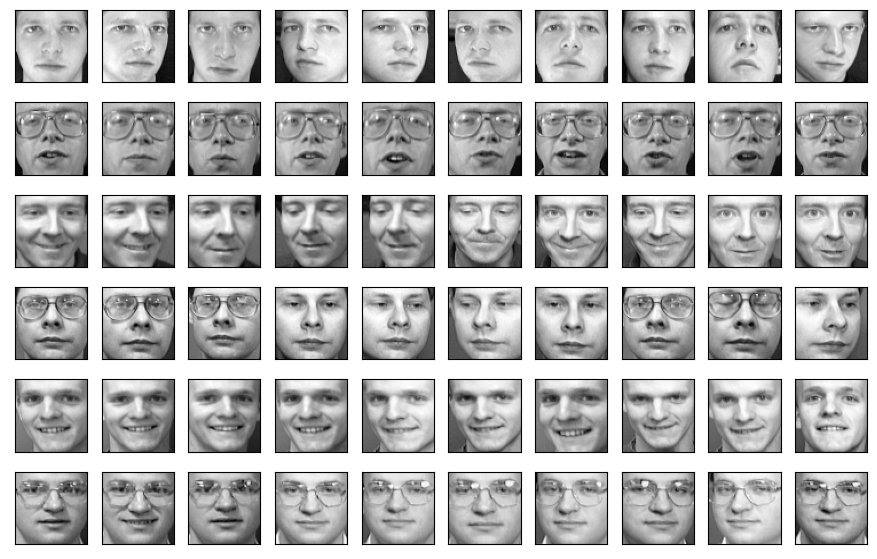

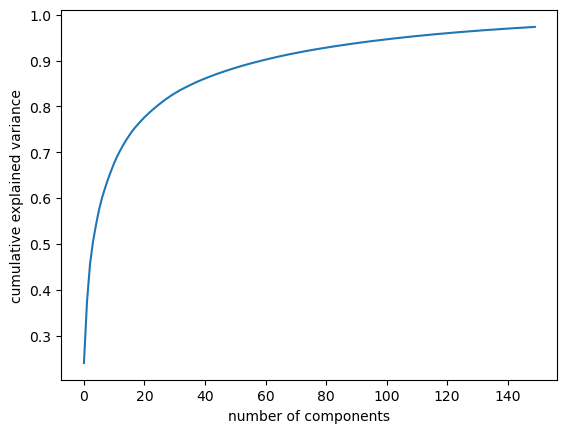

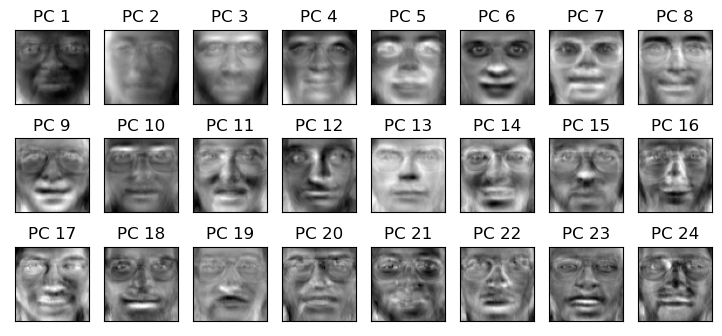

Projecting the input data on the eigenfaces orthonormal basis
Predicting people's names on the test set
done in 0.055s
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         3
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00         6
          17    

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

##Helper functions. Use when needed. 
def show_orignal_images(pixels):
	#Displaying Orignal Images
	fig, axes = plt.subplots(6, 10, figsize=(11, 7),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
	plt.show()

def show_eigenfaces(pca):
	#Displaying Eigenfaces
	fig, axes = plt.subplots(3, 8, figsize=(9, 4),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
	    ax.set_title("PC " + str(i+1))
	plt.show()


## Step 1: Read dataset and visualize it
df = pd.read_csv("dataset/face_data.csv")
targets = df["target"]
pixels = df.drop(["target"],axis=1)

print(np.array(pixels).shape)

show_orignal_images(pixels)
## Step 2: Split Dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(pixels, targets)

## Step 3: Perform PCA.
pca = PCA(n_components=150).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

show_eigenfaces(pca)

## Step 4: Project Training data to PCA
print("Projecting the input data on the eigenfaces orthonormal basis")
Xtrain_pca = pca.transform(x_train)

##############

## Step 5: Initialize Classifer and fit training data
clf = SVC(kernel='rbf',C=1000,gamma=0.001)
clf = clf.fit(Xtrain_pca, y_train)


## Step 6: Perform testing and get classification report
print("Predicting people's names on the test set")
t0 = time()
Xtest_pca = pca.transform(x_test)
y_pred = clf.predict(Xtest_pca)
print("done in %0.3fs" % (time() - t0))
print(classification_report(y_test, y_pred))